In [6]:
#Regex
import re

# Pandas
import pandas as pd

# Numpy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt

# Ipython tool for figsize
from IPython.core.pylabtools import figsize

# train test split
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline

# DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# XGB
import xgboost as xgb

# cross_val_score
from sklearn.model_selection import cross_val_score

# DataframeMapper, CategoricalImputer
from sklearn_pandas import DataFrameMapper, CategoricalImputer

# FeatureUnion
from sklearn.pipeline import FeatureUnion

# Function Transformer
from sklearn.preprocessing import FunctionTransformer

# Plot AUC *(Self Defined Package)
from metrics.roc_auc import roc_auc

# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve

# Methods to check for numeric or categorical data in a dataframe
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# Resampling
from collections import Counter
from imblearn.over_sampling import SMOTE

#Pickle to save models
import pickle

In [7]:
# set display columns
pd.set_option('display.max_columns', 31)

In [8]:
# Load data
df = pd.read_csv('Final_NHANES_2013_2014.csv', dtype = object)
df.head()

,Gender,Age,Poverty,Weight,Height,BMI,Pulse,BPSysAve,BPDiaAve,DirectChol,TotChol,FatFoods,UrineVol1,UrineFlow1,Diabetes,HealthGen,SleepHrsNight,SleepTrouble,PhysActive,WalkBic,VigActiv,ModActiv,TVHrsDay,AlcoholDay,AlcoholYear,Smoke100,mortstat
0,1,69.0,0.84,78.3,171.3,26.7,86.0,122.0,72.0,1.68,4.32,8.0,87.0,0.821,1,Vgood,7.0,Yes,0,0,0,0,2.0,1.0,1.0,1,1
1,1,54.0,1.78,89.5,176.8,28.6,74.0,156.0,62.0,1.29,4.4,0.0,90.0,1.636,1,Fair,9.0,No,1,0,0,0,4.0,4.0,7.0,1,1
2,1,72.0,4.51,88.9,175.3,28.9,68.0,140.0,90.0,1.55,3.26,1.0,66.0,0.684,1,Good,8.0,No,1,0,0,1,4.0,2.0,0.0,1,1
3,0,73.0,5.0,52.0,162.4,19.7,92.0,136.0,86.0,2.2,5.2,0.0,5.0,0.109,0,Poor,9.0,No,1,0,0,0,1.0,2.0,0.0,0,0
4,1,56.0,4.79,105.0,158.7,41.7,60.0,160.0,84.0,0.98,5.84,14.0,197.0,1.187,0,Poor,5.0,No,0,0,0,0,5.0,1.0,5.0,1,1


In [9]:
cols = ['Weight', 'BMI', 'Pulse', 'Diabetes', 'SleepHrsNight', 'Age', 'Smoke100', 'PhysActive', 'WalkBic', 'VigActiv', 'ModActiv', 'TVHrsDay', 'FatFoods', 'AlcoholDay', 'AlcoholYear']
df = df[cols]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.head()

,Weight,BMI,Pulse,Diabetes,SleepHrsNight,Age,Smoke100,PhysActive,WalkBic,VigActiv,ModActiv,TVHrsDay,FatFoods,AlcoholDay,AlcoholYear
0,78.3,26.7,86.0,1,7.0,69.0,1,0,0,0,0,2.0,8.0,1.0,1.0
1,89.5,28.6,74.0,1,9.0,54.0,1,1,0,0,0,4.0,0.0,4.0,7.0
2,88.9,28.9,68.0,1,8.0,72.0,1,1,0,0,1,4.0,1.0,2.0,0.0
3,52.0,19.7,92.0,0,9.0,73.0,0,1,0,0,0,1.0,0.0,2.0,0.0
4,105.0,41.7,60.0,0,5.0,56.0,1,0,0,0,0,5.0,14.0,1.0,5.0


In [10]:
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

In [11]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 5374, 1: 726})


In [12]:
sm = SMOTE(random_state=42)

In [13]:
X_res, y_res = sm.fit_resample(X, y)

In [14]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 5374, 0: 5374})


In [15]:
# Instantiate XGBClassifier
xgb_cl = xgb.XGBClassifier()

In [16]:
# cross validation score
cv_scores = cross_val_score(xgb_cl, X_res, y_res, scoring='balanced_accuracy', cv=3)

In [17]:
# print out the mean cross validation score
print('3-Fold AUC: {}'.format(np.mean(cv_scores)))

3-Fold AUC: 0.9014044470035362


In [18]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, 
                                                    random_state=21, stratify=y_res)

In [19]:
# fit the model
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [20]:
# save the model to disk
filename = 'Diabetes_model.sav'
pickle.dump(xgb_cl, open(filename, 'wb'))

In [21]:
xgb_cl = pickle.load(open(filename, 'rb'))

In [22]:
y_pred_prob = xgb_cl.predict_proba(X_test)[:, 1] # [:, 1]: the second value is the probability for 1

In [23]:
y_pred_prob

array([0.01366808, 0.9447619 , 0.0819043 , ..., 0.03938744, 0.9610507 ,
       0.17452393], dtype=float32)

In [25]:
# instantiate a roc_auc object
ROC = roc_auc(y_test, y_pred_prob, model='XGB')

In [26]:
# AUC score
ROC.auc()

0.9733116013039218

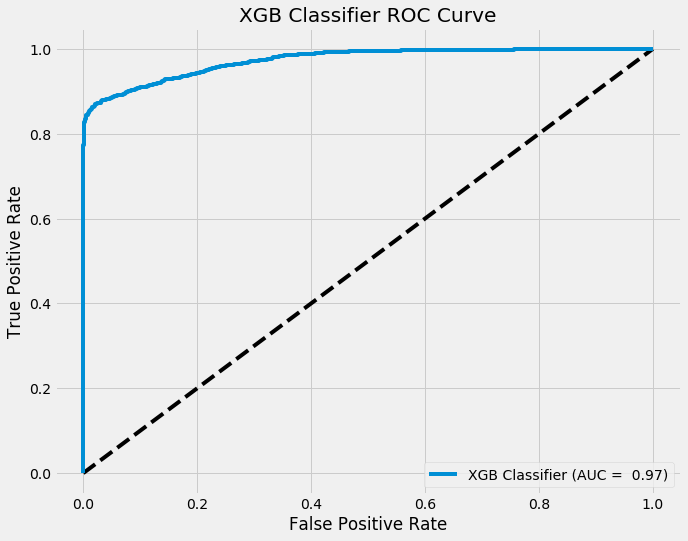

In [27]:
# set figsize
figsize(10,8)

# plot styple
plt.style.use('fivethirtyeight')

# plot roc
ROC.plot_roc()

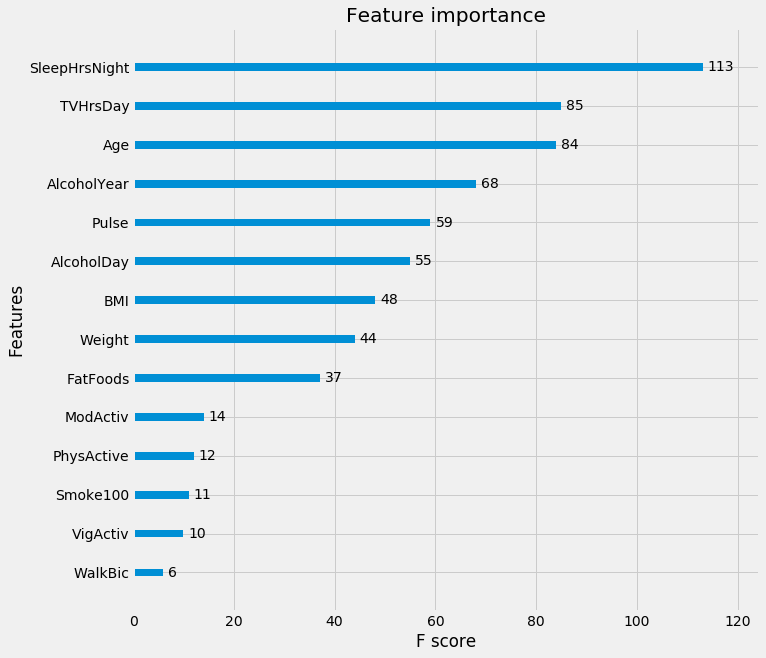

In [28]:
# set figsize
figsize(10,10)

# plot styple
plt.style.use('fivethirtyeight')

# plot feature importance
xgb.plot_importance(xgb_cl)